### 1.

In [1]:
import pandas as pd

data = pd.read_csv('vertebrate.csv',header='infer')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


In [2]:
data['Class'] = data['Class'].replace(['fishes','birds','amphibians','mammals'],'not-a-reptile')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,not-a-reptile
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,not-a-reptile
3,whale,1,1,1,0,0,0,not-a-reptile
4,frog,0,0,1,0,1,1,not-a-reptile
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,not-a-reptile
7,pigeon,1,0,0,1,1,0,not-a-reptile
8,cat,1,1,0,0,1,0,not-a-reptile
9,leopard shark,0,1,1,0,0,0,not-a-reptile


In [3]:
pd.crosstab([data['Warm-blooded'],data['Aquatic Creature']],data['Class'])

Class                          not-a-reptile  reptiles
Warm-blooded Aquatic Creature                         
0            0                             0         2
             1                             5         1
1            0                             5         0
             1                             2         0

In [4]:
from sklearn import tree

Y = data['Class']
X = data.drop(['Name','Class'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=2)
clf = clf.fit(X, Y)

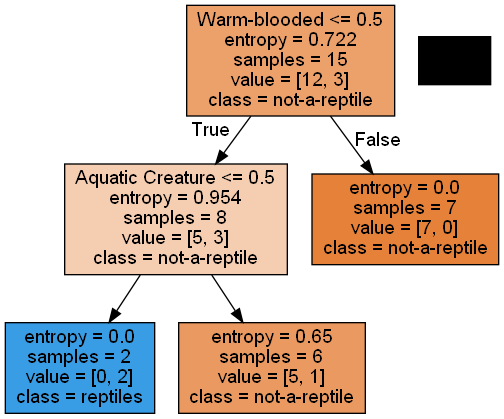

In [5]:
import pydotplus 
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['not-a-reptile','reptiles'], filled=True, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

In [6]:
testData = [['gila monster',0,0,0,0,1,1,'reptiles'],
           ['platypus',1,0,0,0,1,1,'reptiles'],
           ['owl',1,0,0,1,1,0,'not-a-reptile'],
           ['dolphin',1,1,1,0,0,0,'not-a-reptile']]
testData = pd.DataFrame(testData, columns=data.columns)
testData

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,gila monster,0,0,0,0,1,1,reptiles
1,platypus,1,0,0,0,1,1,reptiles
2,owl,1,0,0,1,1,0,not-a-reptile
3,dolphin,1,1,1,0,0,0,not-a-reptile


In [7]:
testY = testData['Class']
testX = testData.drop(['Name','Class'],axis=1)

predY = clf.predict(testX)
predictions = pd.concat([testData['Name'],pd.Series(predY,name='Predicted Class')], axis=1)
predictions

,Name,Predicted Class
0,gila monster,reptiles
1,platypus,not-a-reptile
2,owl,not-a-reptile
3,dolphin,not-a-reptile


In [8]:
from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 0.75


### 2.

In [9]:
from sklearn import tree

Y = data['Class']
X = data.drop(['Name','Class'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=None)
clf = clf.fit(X, Y)

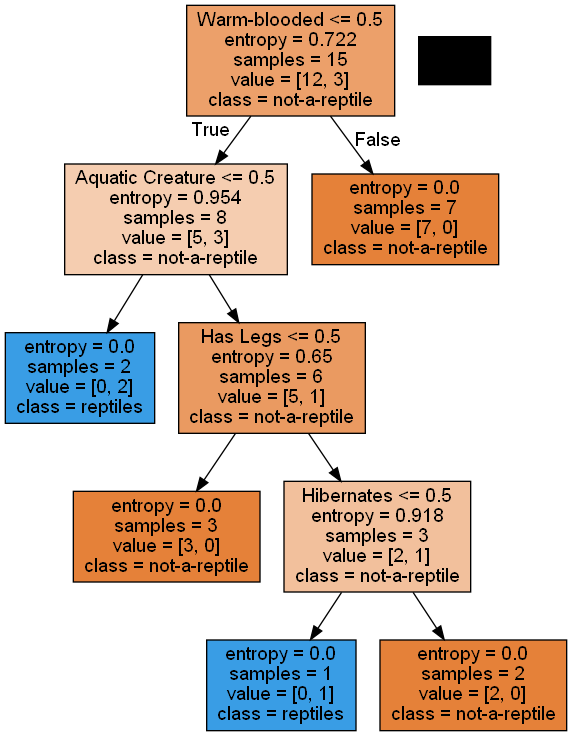

In [10]:
import pydotplus 
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['not-a-reptile','reptiles'], filled=True, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

In [11]:
testY = testData['Class']
testX = testData.drop(['Name','Class'],axis=1)

predY = clf.predict(testX)
predictions = pd.concat([testData['Name'],pd.Series(predY,name='Predicted Class')], axis=1)
predictions

,Name,Predicted Class
0,gila monster,reptiles
1,platypus,not-a-reptile
2,owl,not-a-reptile
3,dolphin,not-a-reptile


In [12]:
from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 0.75


So after set the maximum depth to un-restricted, I find that this the maximum depth of this decisiontree is 4, and the final testing accuracy is same as maximum depth with 2. 

Theoretically，the second decision tree classifier should have a higher testing accuracy, but the result is same, maybe the amount of test set is not enough or the second model is overfitting.

### 3.

To illustrate the problem of model overfitting, we consider a two-dimensional dataset containing 1500 labeled instances, each of which is assigned to one of two classes, 0 or 1. Instances from each class are generated as follows:

    1.Instances from class 1 are generated from a mixture of 3 Gaussian distributions, centered at [6,14], [10,6], and [14 14], respectively.
    2.Instances from class 0 are generated from a uniform distribution in a square region, whose sides have a length equals to 20.

For simplicity, both classes have equal number of labeled instances. The code for generating and plotting the data is shown below. All instances from class 1 are shown in red while those from class 0 are shown in black.

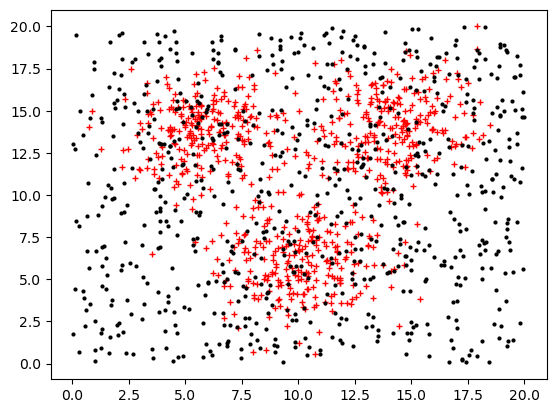

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random

%matplotlib inline

N = 1500

mean1 = [6, 14]
mean2 = [10, 6]
mean3 = [14, 14]
cov = [[3.5, 0], [0, 3.5]]  # diagonal covariance

np.random.seed(50)
X = np.random.multivariate_normal(mean1, cov, int(N/6))
X = np.concatenate((X, np.random.multivariate_normal(mean2, cov, int(N/6))))
X = np.concatenate((X, np.random.multivariate_normal(mean3, cov, int(N/6))))
X = np.concatenate((X, 20*np.random.rand(int(N/2),2)))
Y = np.concatenate((np.ones(int(N/2)),np.zeros(int(N/2))))

plt.plot(X[:int(N/2),0],X[:int(N/2),1],'r+',X[int(N/2):,0],X[int(N/2):,1],'k.',ms=4)

divide the data set to training set:X(Y)_train,validation set:X(Y)_validate, test set: X(Y)_test

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_Test, Y_train, Y_Test = train_test_split(X, Y, test_size=0.5, random_state=1)
X_validate, X_test, Y_validate, Y_test = train_test_split(X_Test, Y_Test, test_size=0.5, random_state=1)


Using training set and validation set to model fitting and evaluation

Text(0, 0.5, 'Accuracy')

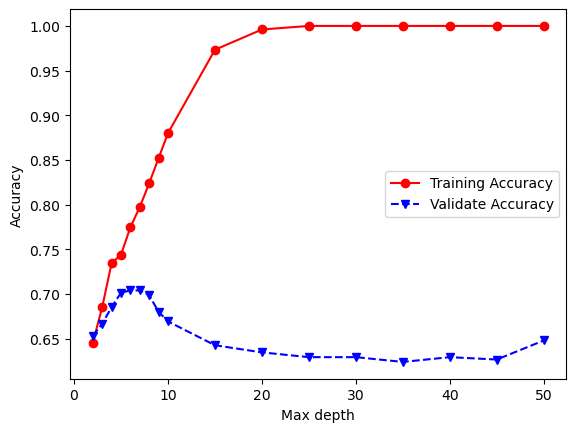

In [15]:
from sklearn import tree
from sklearn.metrics import accuracy_score
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predValidate = clf.predict(X_validate)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_validate, Y_predValidate)
    index += 1
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Validate Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

The plot above shows that training accuracy will continue to improve as the maximum depth of the tree increases . However, the test accuracy initially improves up to a maximum depth of 7, before it gradually decreases due to model overfitting.

So the best depth of the tree is 7.

And the the testing accuracy using the depth 7 as below:

In [16]:
clf = tree.DecisionTreeClassifier(max_depth=7)
clf = clf.fit(X_train, Y_train)
Y_predTest = clf.predict(X_test)
Test_Accuracy = accuracy_score(Y_test, Y_predTest)
Test_Accuracy

0.7093333333333334